In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()  # Fixed the super() call
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 16 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Define data transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize LeNet model and optimizer
model = LeNet()
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
sgd_loss = []
acc_sgd = []
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    loss_avg = 0
    correct = 0
    total = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx}/{len(train_loader)}], Loss: {loss.item():.4f}')
        loss_avg += loss.item()
    acc_sgd.append(correct / total)
    loss_avg /= len(train_loader)
    sgd_loss.append(loss_avg)
    

# Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')
print(sgd_acc)
print(len(sgd_acc))

Epoch [1/10], Batch [0/938], Loss: 2.3053
Epoch [1/10], Batch [100/938], Loss: 2.3092
Epoch [1/10], Batch [200/938], Loss: 2.3000
Epoch [1/10], Batch [300/938], Loss: 2.2916
Epoch [1/10], Batch [400/938], Loss: 2.2983
Epoch [1/10], Batch [500/938], Loss: 2.2854
Epoch [1/10], Batch [600/938], Loss: 2.2937
Epoch [1/10], Batch [700/938], Loss: 2.2461
Epoch [1/10], Batch [800/938], Loss: 2.2488
Epoch [1/10], Batch [900/938], Loss: 2.1080
Epoch [2/10], Batch [0/938], Loss: 1.9578
Epoch [2/10], Batch [100/938], Loss: 1.3730
Epoch [2/10], Batch [200/938], Loss: 1.1838
Epoch [2/10], Batch [300/938], Loss: 0.8007
Epoch [2/10], Batch [400/938], Loss: 0.7379
Epoch [2/10], Batch [500/938], Loss: 0.4820
Epoch [2/10], Batch [600/938], Loss: 0.5773
Epoch [2/10], Batch [700/938], Loss: 0.2402
Epoch [2/10], Batch [800/938], Loss: 0.4070
Epoch [2/10], Batch [900/938], Loss: 0.3148
Epoch [3/10], Batch [0/938], Loss: 0.2372
Epoch [3/10], Batch [100/938], Loss: 0.3453
Epoch [3/10], Batch [200/938], Loss: 0

In [2]:
import mlrose
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
# Define LeNet-5 architecture
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()  # Fixed the super() call
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 16 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define data transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize LeNet model and optimizer
model = LeNet()
criterion = nn.CrossEntropyLoss()

# Define fitness function for mlrose
def fitness_function(weights):
    weights_dict = convert_weights_to_dict(weights)
    model.load_state_dict(weights_dict)
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    accuracy = correct / total
    # Minimize the negative of accuracy
    return -accuracy

def convert_weights_to_dict(weights):
    # Convert a flat array of weights to a dictionary-like object
    weights_dict = {}
    index = 0
    for name, param in model.named_parameters():
        weight_size = np.prod(param.size())
        weights_dict[name] = torch.tensor(weights[index:index + weight_size].reshape(param.size()))
        index += weight_size
    return weights_dict

# Convert model parameters to a flat array for optimization
initial_weights = np.concatenate([param.data.cpu().numpy().flatten() for param in model.parameters()])

# Define optimization problem
problem = mlrose.DiscreteOpt(length=len(initial_weights), fitness_fn=mlrose.CustomFitness(fitness_function), maximize=False)

# Define Randomized Hill Climbing algorithm
best_state, best_fitness,acc_rhc = mlrose.random_hill_climb(problem, max_attempts=50, max_iters=100, restarts=0, init_state=initial_weights,curve=True)

# Update the model with the best state
best_weights_dict = convert_weights_to_dict(best_state)
model.load_state_dict(best_weights_dict)

# Evaluate the final model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')
print(acc_rhc.shape)
print(acc_rhc)

Test Accuracy: 20.26%
(86,)
[0.109  0.1106 0.1106 0.1111 0.1111 0.1129 0.1153 0.1153 0.1165 0.1395
 0.1395 0.1395 0.1395 0.1395 0.1395 0.1395 0.1395 0.1396 0.1558 0.1558
 0.1558 0.1558 0.1558 0.1559 0.1644 0.1644 0.1677 0.1682 0.1682 0.1682
 0.1684 0.1774 0.1774 0.1774 0.178  0.178  0.178  0.178  0.178  0.178
 0.178  0.178  0.178  0.1836 0.1836 0.1836 0.1836 0.1867 0.1867 0.1867
 0.1867 0.1867 0.1899 0.1899 0.1899 0.1899 0.1899 0.1909 0.1909 0.1909
 0.1909 0.1909 0.1909 0.192  0.192  0.192  0.1941 0.202  0.202  0.2021
 0.2021 0.2021 0.2021 0.2021 0.2021 0.2026 0.2026 0.2026 0.2026 0.2026
 0.2026 0.2026 0.2026 0.2026 0.2026 0.2026]


In [14]:
import mlrose
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

# Define LeNet-5 architecture
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()  # Fixed the super() call
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 16 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define data transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize LeNet model and optimizer
model = LeNet()
criterion = nn.CrossEntropyLoss()

# Define fitness function for mlrose
def fitness_function(weights):
    weights_dict = convert_weights_to_dict(weights)
    model.load_state_dict(weights_dict)
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    accuracy = correct / total
    # Minimize the negative of accuracy
    return -accuracy

def convert_weights_to_dict(weights):
    # Convert a flat array of weights to a dictionary-like object
    weights_dict = {}
    index = 0
    for name, param in model.named_parameters():
        weight_size = np.prod(param.size())
        weights_dict[name] = torch.tensor(weights[index:index + weight_size].reshape(param.size()))
        index += weight_size
    return weights_dict

# Convert model parameters to a flat array for optimization
initial_weights = np.concatenate([param.data.cpu().numpy().flatten() for param in model.parameters()])

# Define optimization problem
problem = mlrose.DiscreteOpt(length=len(initial_weights), fitness_fn=mlrose.CustomFitness(fitness_function), maximize=False)

# Define Simulated Annealing algorithm
# best_state, best_fitness,acc_sa = mlrose.simulated_annealing(problem, schedule=mlrose.GeomDecay(), max_attempts=50, max_iters=100, init_state=initial_weights,curve=True)
best_state, best_fitness,acc_sa = mlrose.algorithms.simulated_annealing(problem, max_attempts=50, max_iters=100,curve=True)
# Update the model with the best state
best_weights_dict = convert_weights_to_dict(best_state)
model.load_state_dict(best_weights_dict)

# Evaluate the final model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')
print(acc_sa.shape)
print(acc_sa)

Test Accuracy: 8.92%
(100,)
[0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892
 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892
 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892
 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892
 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892
 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892
 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892
 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892
 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892
 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892 0.0892]


In [5]:
import mlrose
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

# Define LeNet-5 architecture
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()  # Fixed the super() call
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 16 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define data transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize LeNet model and optimizer
model = LeNet()
criterion = nn.CrossEntropyLoss()

# Define fitness function for mlrose
def fitness_function(weights):
    weights_dict = convert_weights_to_dict(weights)
    model.load_state_dict(weights_dict)
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    accuracy = correct / total
    # Minimize the negative of accuracy
    return -accuracy

def convert_weights_to_dict(weights):
    # Convert a flat array of weights to a dictionary-like object
    weights_dict = {}
    index = 0
    for name, param in model.named_parameters():
        weight_size = np.prod(param.size())
        weights_dict[name] = torch.tensor(weights[index:index + weight_size].reshape(param.size()))
        index += weight_size
    return weights_dict

# Convert model parameters to a flat array for optimization
initial_weights = np.concatenate([param.data.cpu().numpy().flatten() for param in model.parameters()])

# Define optimization problem
problem = mlrose.DiscreteOpt(length=len(initial_weights), fitness_fn=mlrose.CustomFitness(fitness_function), maximize=False)

# Define Genetic Algorithm parameters
ga_params = mlrose.algorithms.genetic_alg(problem=problem,
                                          pop_size=5,
                                          mutation_prob=0.1,
                                          max_attempts=5,
                                          max_iters=10,
                                          curve=True,
                                        #   curve=True,
                                          random_state=42)

# Run the Genetic Algorithm
ga_run_stats, ga_run_fit,acc_ga = ga_params

# Get the best state from the Genetic Algorithm
best_state = ga_run_stats

# Update the model with the best state
best_weights_dict = convert_weights_to_dict(best_state)
model.load_state_dict(best_weights_dict)

# Evaluate the final model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')
print(acc_ga.shape)
print(acc_ga)

Test Accuracy: 19.05%
(10,)
[0.1135 0.1135 0.1135 0.1135 0.1905 0.1905 0.1905 0.1905 0.1905 0.1905]


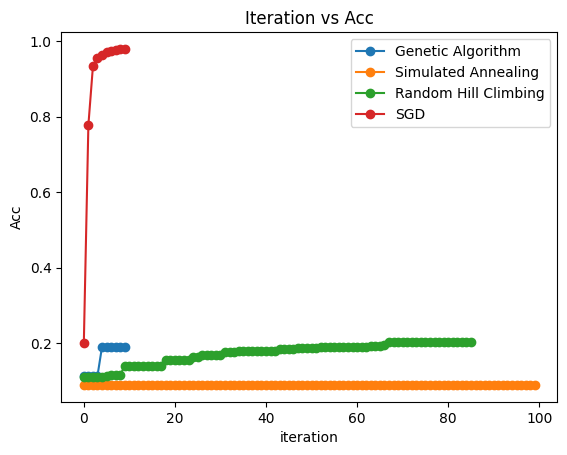

In [15]:
import matplotlib.pyplot as plt

# GA
x1 = [i for i in range(1000000)]
x2 = [i for i in range(1000000)]
x3 = [i for i in range(1000000)]
x4 = [i for i in range(100)]
# y1 = [0.006,0.012,0.016,0.022]
# # SA
# x2 = [20,40,60,80]
# y2 = [0.17,0.34,3.11]
# x3 = [50,100,200]
# y3 = [0.21,0.47,0.94]
# x4 = [10,50,100]
# y4 = [0.34,1.64,4.75]
# y1 = [i * 3 for i in y1]
# y2 = [i * 3 for i in y2]
# y3 = [i * 3 for i in y3]
# y4 = [i * 3 for i in y4]
# Create a figure and axis
fig, ax = plt.subplots()
x1 = [i for i in range(len(acc_ga))]
x2 = [i for i in range(len(acc_sa))]
x3 = [i for i in range(len(acc_rhc))]
x4 = [i for i in range(len(acc_sgd))]
# Plot the data
ax.plot(x1, acc_ga, marker='o', linestyle='-',label='Genetic Algorithm')
ax.plot(x2, acc_sa, marker='o', linestyle='-',label='Simulated Annealing')
ax.plot(x3, acc_rhc, marker='o', linestyle='-',label='Random Hill Climbing')
ax.plot(x4, acc_sgd, marker='o', linestyle='-',label='SGD')
# ax.plot(x4, y4, marker='o', linestyle='-',label='MIMIC')
# Set labels for the x and y axes
ax.set_xlabel('iteration')
ax.set_ylabel('Acc')

# Set the title for the plot
ax.set_title('Iteration vs Acc')

# Display the plot
plt.legend()
plt.show()